# Weather Data of the Year 2021

Using weather data from 2016 to predict something in 2021 can result in inaccuracies, as weather patterns and conditions can vary significantly from year to year. Therefore, it is essential to use the most up-to-date weather data available to make accurate predictions.

If you use weather data from 2016, your model may not capture the variations in weather patterns that have occurred in the intervening years, which could lead to incorrect predictions. Additionally, using outdated data could result in incorrect cause-and-effect relationships, as factors that were significant in 2016 may not be as relevant in 2021.

## NASA/POWER CERES/MERRA2 Native Resolution Hourly Data

Benefits of using NASA/POWER hourly weather data:
* many additional climate values are selectable
* location of most fleet usage can be selected, resulting in having more accurate weather data

### POWER Hourly API Request

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url= "https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=T2M,PRECTOTCORR,WS50M&community=RE&longitude=-87.6521&latitude=41.8831&start=20210101&end=20220101&format=JSON"

response = requests.get(url)

if response.status_code == 200:
    print("The request was successful")
else:
    print("Error retrieving data from API")

data = response.json()

# extract the data and convert to DataFrame
weather_df = pd.DataFrame.from_dict(data["properties"]["parameter"], orient="columns")

# convert the index to a datetime format
weather_df.index = pd.to_datetime(weather_df.index, format="%Y%m%d%H")

# order the datetimes in ascending order
weather_df = weather_df.sort_index(ascending=True)

# rename the columns
weather_df = weather_df.rename(columns={"T2M": "temp_2m", "PRECTOTCORR": "precip", "WS50M": "windspeed_50m"})

# display the DataFrame
weather_df.head()

The request was successful


,temp_2m,precip,windspeed_50m
2020-12-31 18:00:00,-2.24,0.0,1.12
2020-12-31 19:00:00,-2.14,0.0,2.14
2020-12-31 20:00:00,-1.89,0.0,3.62
2020-12-31 21:00:00,-1.63,0.0,4.75
2020-12-31 22:00:00,-1.45,0.0,5.49


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-12-31 18:00:00 to 2022-01-01 17:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_2m        8784 non-null   float64
 1   precip         8784 non-null   float64
 2   windspeed_50m  8784 non-null   float64
dtypes: float64(3)
memory usage: 274.5 KB


**Filtering the Year 2021**

In [4]:
# filter the year 2021
weather_df = weather_df.loc['2021-01-01':'2021-12-31']

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_2m        8760 non-null   float64
 1   precip         8760 non-null   float64
 2   windspeed_50m  8760 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


In [6]:
weather_df.index.unique()

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

**=> the dataset now consists of every hour of the year 2021**

In [7]:
# convert precipitation (mm/hr) to a binary variable indicating whether it rained or not, define a threshold value like 0.4 mm/hr (slightly raining)
# weather_df['precip'] = (weather_df['precip'] > 0.4).astype(int)

In [8]:
weather_df.head(24)

,temp_2m,precip,windspeed_50m
2021-01-01 00:00:00,-1.33,0.00,6.35
2021-01-01 01:00:00,-1.28,0.00,7.12
2021-01-01 02:00:00,-1.31,0.00,7.48
2021-01-01 03:00:00,-1.16,0.00,7.30
2021-01-01 04:00:00,-0.98,0.00,7.33
2021-01-01 05:00:00,-0.77,0.00,8.15
2021-01-01 06:00:00,-0.31,0.00,9.86
2021-01-01 07:00:00,-0.07,0.00,10.21
2021-01-01 08:00:00,0.14,0.00,10.74
2021-01-01 09:00:00,0.13,0.01,10.97


### Weather Data Validation

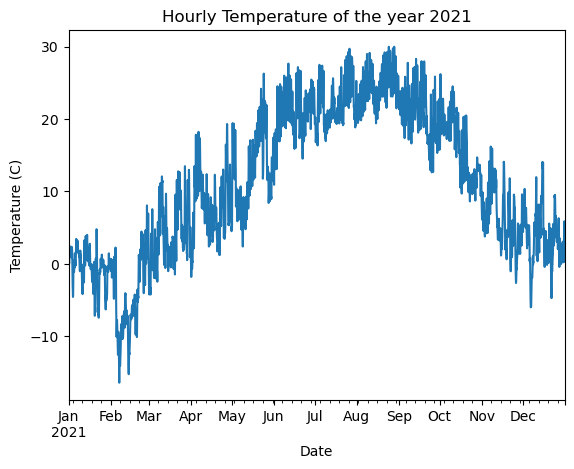

In [9]:
# plot the temperature data
weather_df["temp_2m"].plot()
plt.title("Hourly Temperature of the year 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.show()

**Reference data from the Team Assignment document:**
* NOAA Online Weather Data: https://www.weather.gov/wrh/climate?wfo=lot

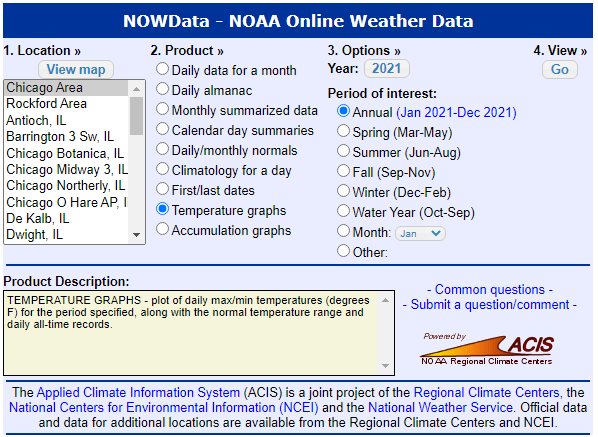    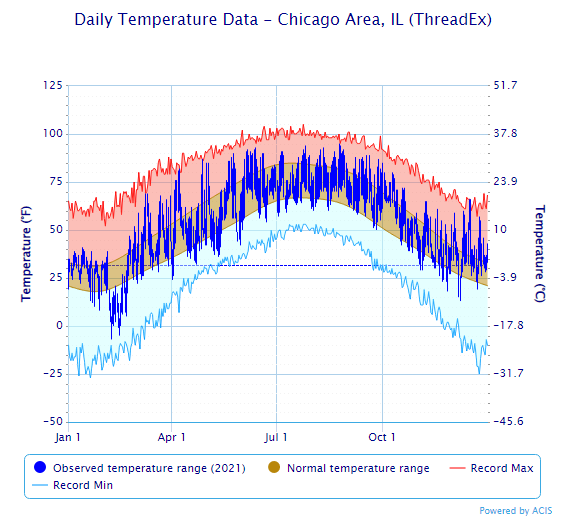


**=> the temperature graphs of both sources are very similar, so I assume that the source "NASA/POWER CERES/MERRA2 Native Resolution Hourly Data" provides valid data**



**For comparison, you can also see the temperature curve for 2016 here:**

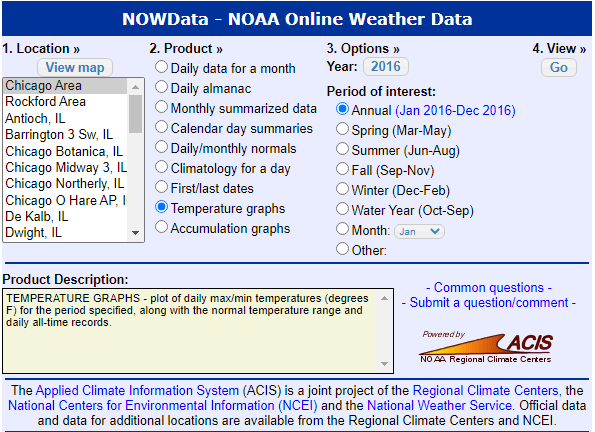      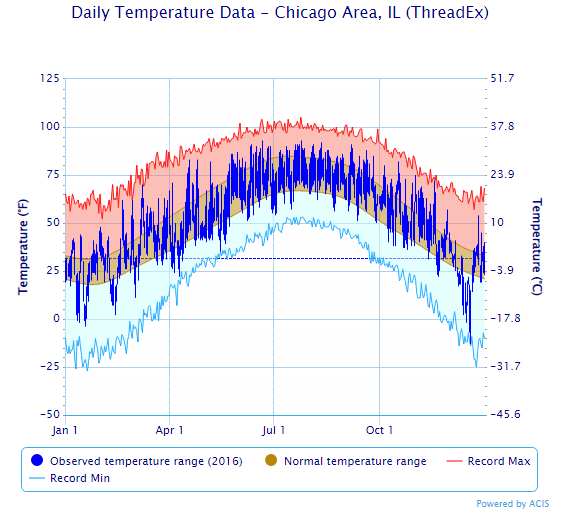

**=> Therefore, it is not advisable to use weather data from 2016 to make predictions for 2021, as there is variation in temperature data between the two years.**

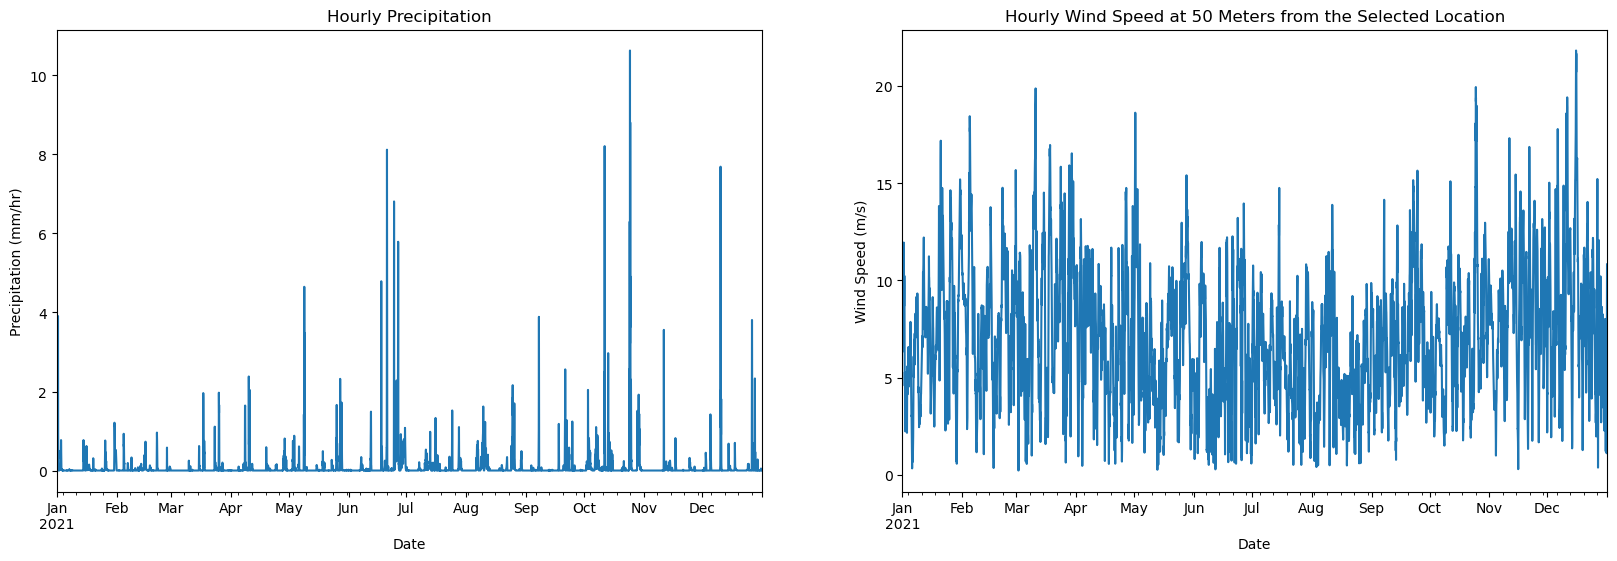

In [10]:
# create a figure with two subplots using pandas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=False)

# plot the precipitation data in the first subplot
weather_df.plot(y='precip', ax=axes[0], legend=False)
axes[0].set_title('Hourly Precipitation')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Precipitation (mm/hr)')

# plot the wind speed data in the second subplot
weather_df.plot(y='windspeed_50m', ax=axes[1], legend=False)
axes[1].set_title('Hourly Wind Speed at 50 Meters from the Selected Location')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Wind Speed (m/s)')

plt.show()

## WUNDERGROUND Hourly Data

### Web Scraping

In [11]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

Sources:

* https://zperzan.github.io/projects/scrape-weather-underground/
* https://bojanstavrikj.github.io/content/page1/wunderground_scraper_daily

In [12]:
def render_page(url,type):
    chrome_driver_path = "C:\Drivers\chromedriver_win32\chromedriver.exe"
    driver = webdriver.Chrome(chrome_driver_path)
    driver.get(url)
    time.sleep(3)
    if type =="C":
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'wuSettings'))
        )
        element.click()
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="wuSettings-quick"]/div/a[2]')))
        element.click()
        time.sleep(3)
        r = driver.page_source
        driver.quit()
    if type=="F":
        r = driver.page_source
        driver.quit()
    return r



def observations_scraper(page,dates,type):
    output = pd.DataFrame()

    for d in dates:
        url = str(str(page) + str(d))

        r = render_page(url,type)

        soup = BS(r, "html.parser",)
        container = soup.find('lib-city-history-observation')
        check = container.find('tbody')

        data = []
        data_hour = []
        for i in check.find_all('span', class_='ng-star-inserted'):
            trial = i.get_text()
            data_hour.append(trial)

        for i in check.find_all('span', class_='wu-value wu-value-to'):
            trial = i.get_text()
            data.append(trial)
            
        print(data)
        print(data_hour)
        
        numbers = pd.DataFrame([data[i:i+7] for i in range(0, len(data), 7)],columns=["Temperature","Dew Point","Humidity","Wind Speed","Wind Gust","Pressure","Precipitation"])
        hour = pd.DataFrame(data_hour[0::17],columns=["Time"])
        wind = pd.DataFrame(data_hour[7::17],columns=["Wind"])
        condition = pd.DataFrame(data_hour[16::17],columns=["Condition"])

        dfs = [hour,numbers,wind,condition]

        df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)
        df_final['Date'] = str(d)

        output = output.append(df_final)
        print(str(str(d) + ' finished!'))

    return output


## CORRECT values for Lisbon, Portugal
# scraping the observations from : "https://www.wunderground.com/history/daily/pt/lisbon/LPPT/date/2020-12-27"
page = "https://www.wunderground.com/history/daily/pt/lisbon/LPPT/date/"
dates = ["2020-12-27"]
hourly = observations_scraper(page,dates,"C")


## FAULTY values for Chicago, IL !!!
# scraping the observations from : "https://www.wunderground.com/history/daily/us/il/chicago/KMDW/date"
# page = "https://www.wunderground.com/history/daily/us/il/chicago/KMDW/date/2021-1-2"
# dates = ["2021-1-2"]
# hourly = observations_scraper(page,dates,"C")

['6', '-2', '59', '0', '0', '1,012.20', '0.0', '0', '0', '0', '0', '0', '1,012.30', '0.0', '5', '-1', '67', '0', '0', '1,011.60', '0.0', '0', '0', '0', '0', '0', '1,010.90', '0.0', '3', '-1', '73', '0', '0', '1,010.20', '0.0', '4', '-1', '70', '0', '0', '1,010.20', '0.0', '3', '-1', '74', '0', '0', '1,009.50', '0.0', '3', '-1', '76', '0', '0', '1,009.60', '0.0', '3', '1', '86', '0', '0', '0.00', '0.0', '6', '3', '85', '0', '0', '1,009.20', '0.0', '0', '0', '0', '0', '0', '1,009.30', '0.0', '10', '4', '67', '0', '0', '1,009.20', '0.0', '0', '0', '0', '0', '0', '1,008.10', '0.0', '0', '0', '0', '0', '0', '1,006.70', '0.0', '13', '7', '64', '14', '0', '1,005.30', '0.0', '0', '0', '0', '0', '0', '1,004.90', '0.0', '0', '0', '0', '0', '0', '1,004.30', '0.0', '0', '0', '0', '0', '0', '1,004.00', '0.0', '0', '0', '0', '0', '0', '1,003.50', '0.0', '0', '0', '0', '0', '0', '1,002.60', '0.0', '12', '7', '69', '18', '0', '0.00', '0.0', '0', '0', '0', '0', '0', '1,001.50', '0.0', '0', '0', '0', '0

C:\Users\OK\AppData\Local\Temp\ipykernel_16040\3096966065.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(df_final)


In [13]:
hourly

,Time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,Date
0,1:00 AM,6,-2,59,0,0,"1,012.20",0.0,CALM,N/A,2020-12-27
1,2:00 AM,0,0,0,0,0,"1,012.30",0.0,,N/A,2020-12-27
2,3:00 AM,5,-1,67,0,0,"1,011.60",0.0,CALM,N/A,2020-12-27
3,4:00 AM,0,0,0,0,0,"1,010.90",0.0,,N/A,2020-12-27
4,5:00 AM,3,-1,73,0,0,"1,010.20",0.0,CALM,N/A,2020-12-27
5,6:00 AM,4,-1,70,0,0,"1,010.20",0.0,CALM,N/A,2020-12-27
6,7:00 AM,3,-1,74,0,0,"1,009.50",0.0,CALM,N/A,2020-12-27
7,8:00 AM,3,-1,76,0,0,"1,009.60",0.0,CALM,N/A,2020-12-27
8,9:00 AM,3,1,86,0,0,0.00,0.0,CALM,N/A,2020-12-27
9,10:00 AM,6,3,85,0,0,"1,009.20",0.0,CALM,N/A,2020-12-27


## Archive

In [ ]:
# weather_df.to_pickle("weather_data_2021.pkl")